In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [10]:
df.sample(10)

,Gender,Age,EstimatedSalary,Purchased
282,0,37,70000,1
316,1,54,104000,1
289,1,37,78000,1
50,1,24,32000,0
182,1,32,117000,1
123,0,35,53000,0
102,1,32,86000,0
73,1,33,113000,0
126,0,42,65000,0
255,1,52,90000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.drop('User ID',axis=1,inplace=True)

In [9]:
df.sample()

,Gender,Age,EstimatedSalary,Purchased
206,1,55,130000,1


In [8]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape

(300, 3)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [18]:
X_train.shape

(300, 3)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

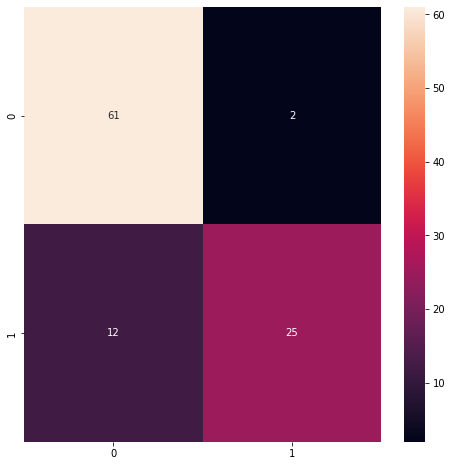

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [28]:
matrix=confusion_matrix(y_test,y_pred)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [32]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)